# UKF Project - Visualizations

### Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib inline

### Parameter settings & data upload
File records:
- Acceleration noise / yaw rate dot noise --> file prefix --> (observations)
- `30   /  30   -->    a30yrd30`
- `3    /   3   -->      a3yrd3`
- `1    /   3   -->      a1yrd3`
- `1    /   1   -->      a1yrd1`
- `0.5  /   1   -->     a05yrd1`
- `0.5  / 0.5   -->    a05yrd05`
- `0.5  / 0.5   -->    a05yrd05_ini0303  -->  (px & py sigma initialization = 0.3)`
- `0.25 / 0.25  -->  a025yrd025_ini0303  -->  (px & py sigma initialization = 0.3)`
- `0.1  / 0.1   -->    a01yrd01_ini0303  -->  (px & py sigma initialization = 0.3)`

In [2]:
noise_param_settings = 'a025yrd025_ini0303'
file = noise_param_settings + '_' + 'data_record.txt'
image_prefix = noise_param_settings + '_'

#input file fields as they are saved into the UKF output file
my_cols=['meas_counter','sensor_type','time_stamp',
         'px_est','py_est','vx_est','vy_est',
         'px_meas','py_meas',
         'px_gt','py_gt','vx_gt','vy_gt',
         'NIS']
with open('../build/'+file) as f:
    table_ekf_output = pd.read_table(f, sep='\t', header=0, names=my_cols, lineterminator='\n')

In [3]:
table_ekf_output.head()

,meas_counter,sensor_type,time_stamp,px_est,py_est,vx_est,vy_est,px_meas,py_meas,px_gt,py_gt,vx_gt,vy_gt,NIS
0,1,0,1477010443000000,0.312243,0.580340,0.00000,0.000000e+00,0.312243,0.580340,0.600000,0.600000,5.19994,0.000000,6.953220e-310
1,2,1,1477010443050000,0.764394,0.657056,7.20687,3.721060e-16,0.862916,0.534212,0.859997,0.600045,5.19975,0.001797,7.485480e+01
2,3,0,1477010443100000,1.145470,0.512927,6.91252,-2.079610e+00,1.173850,0.481073,1.119980,0.600225,5.19943,0.005390,4.877520e-01
3,4,1,1477010443150000,1.262230,0.547549,7.16811,-3.782560e-01,0.969149,0.397513,1.379960,0.600629,5.19898,0.010778,1.977360e+00
4,5,0,1477010443200000,1.625630,0.567370,7.17012,1.656280e-01,1.650630,0.624690,1.639900,0.601347,5.19839,0.017960,2.969120e-01


### Data extraction & preparation

In [4]:
# Measurement counter
counter = table_ekf_output['meas_counter']
Lidar_counter = table_ekf_output[table_ekf_output['sensor_type'] == 0]['meas_counter']
Radar_counter = table_ekf_output[table_ekf_output['sensor_type'] == 1]['meas_counter']

# Time stamp
time = table_ekf_output['time_stamp']

# Ground Truth
x_gt = table_ekf_output['px_gt']
y_gt = table_ekf_output['py_gt']
vx_gt = table_ekf_output['vx_gt']
vy_gt = table_ekf_output['vy_gt']

# Estimations
x_est = table_ekf_output['px_est']
y_est = table_ekf_output['py_est']
vx_est = table_ekf_output['vx_est']
vy_est = table_ekf_output['vy_est']

# Measurements
x_meas = table_ekf_output['px_meas']
y_meas = table_ekf_output['py_meas']

# NIS
Lidar_NIS = table_ekf_output[table_ekf_output['sensor_type'] == 0]['NIS']
Radar_NIS = table_ekf_output[table_ekf_output['sensor_type'] == 1]['NIS']

## Position tracking performance

#### X-Y position

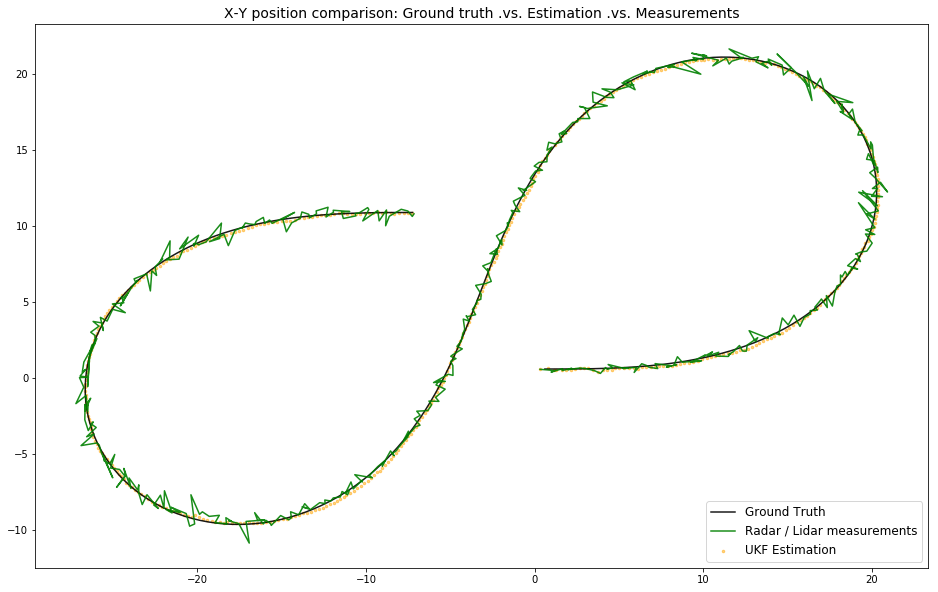

In [5]:
fig, ax = plt.subplots(1,1, figsize=(16,10))

ax.plot(x_gt, y_gt, alpha=0.9, c = 'black', label='Ground Truth')
ax.scatter(x_est, y_est, alpha=0.5, c = 'orange', s = 25, marker = '.', label='UKF Estimation')
# ax.plot(x_est, y_est, alpha=0.5, c = 'orange', label='UKF Estimation')
ax.plot(x_meas, y_meas, alpha=0.9, c = 'green', label='Radar / Lidar measurements')

ax.set_title('X-Y position comparison: Ground truth .vs. Estimation .vs. Measurements', fontsize =14)
ax.legend(fontsize =12, loc = 'lower right')
# ax.set_xlabel('X', fontsize = 11)
# ax.set_ylabel('Y', fontsize = 11)

plt.show()

fig.savefig('report_images/'+image_prefix+'xy_position_comparison')

#### Independent X, Y position

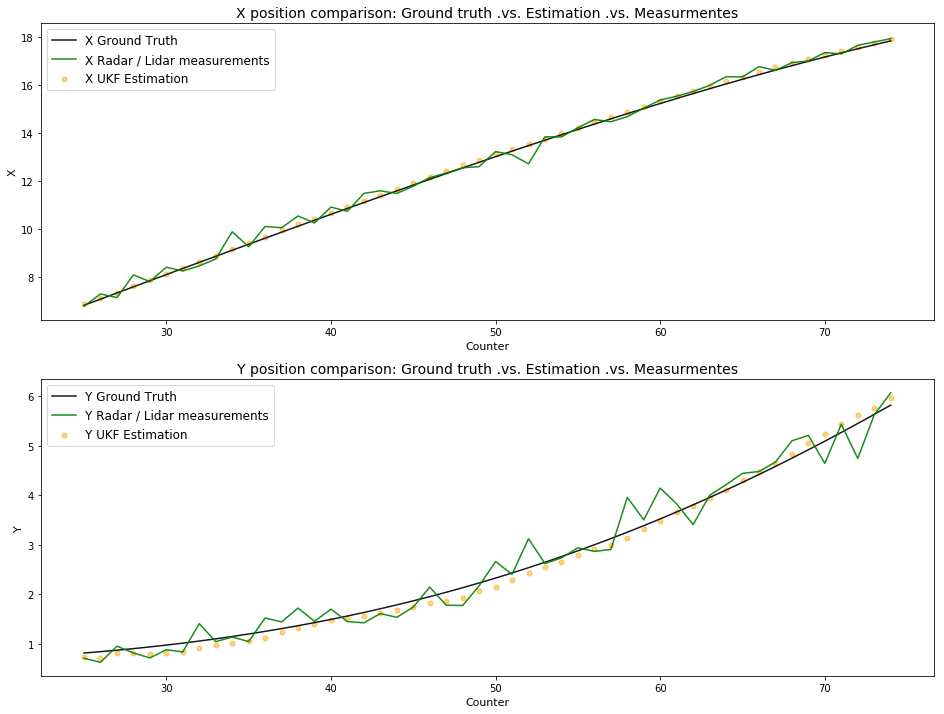

In [6]:
fig, axes = plt.subplots(2,1, figsize=(16,12))
ax1, ax2 = axes

range_width = 50
range_from = np.random.choice(len(counter) - range_width)
range_to = range_from + range_width

ax1.plot(counter[range_from:range_to], x_gt[range_from:range_to], alpha=0.9, c = 'black', label='X Ground Truth')
ax1.scatter(counter[range_from:range_to], x_est[range_from:range_to], alpha=0.5, c = 'orange', s = 25, marker = 'o', label='X UKF Estimation')
ax1.plot(counter[range_from:range_to], x_meas[range_from:range_to], alpha=0.9, c = 'green', label='X Radar / Lidar measurements')
ax1.legend(fontsize =12)

ax1.set_title('X position comparison: Ground truth .vs. Estimation .vs. Measurmentes', fontsize =14)
ax1.legend(fontsize =12)
ax1.set_xlabel('Counter', fontsize = 11)
ax1.set_ylabel('X', fontsize = 11)

ax2.plot(counter[range_from:range_to], y_gt[range_from:range_to], alpha=0.9, c = 'black', label='Y Ground Truth')
ax2.scatter(counter[range_from:range_to], y_est[range_from:range_to], alpha=0.5, c = 'orange', s = 25, marker = 'o', label='Y UKF Estimation')
ax2.plot(counter[range_from:range_to], y_meas[range_from:range_to], alpha=0.9, c = 'green', label='Y Radar / Lidar measurements')
ax2.legend(fontsize =12)

ax2.set_title('Y position comparison: Ground truth .vs. Estimation .vs. Measurmentes', fontsize =14)
ax2.legend(fontsize =12)
ax2.set_xlabel('Counter', fontsize = 11)
ax2.set_ylabel('Y', fontsize = 11)

plt.show()

fig.savefig('report_images/'+image_prefix+'independent_x_y_position_comparison')

## Velocity estimation performance

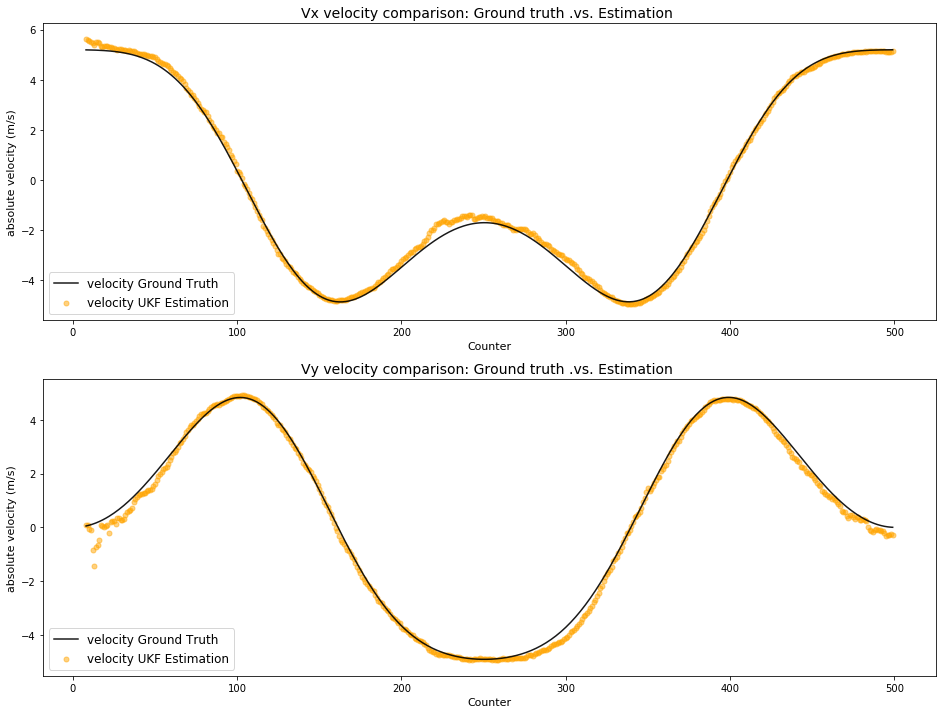

In [7]:
fig, axes = plt.subplots(2,1, figsize=(16,12))
ax1, ax2 = axes

skip_first = 7

ax1.plot(counter[skip_first:], vx_gt[skip_first:], alpha=0.9, c = 'black', label='velocity Ground Truth')
ax1.scatter(counter[skip_first:], vx_est[skip_first:], alpha=0.5, c = 'orange', s = 25, marker = 'o', label='velocity UKF Estimation')
ax1.legend(fontsize =12)

ax1.set_title('Vx velocity comparison: Ground truth .vs. Estimation ', fontsize =14)
ax1.legend(fontsize =12, loc = 'lower left')
ax1.set_xlabel('Counter', fontsize = 11)
ax1.set_ylabel('absolute velocity (m/s)', fontsize = 11)

ax2.plot(counter[skip_first:], vy_gt[skip_first:], alpha=0.9, c = 'black', label='velocity Ground Truth')
ax2.scatter(counter[skip_first:], vy_est[skip_first:], alpha=0.5, c = 'orange', s = 25, marker = 'o', label='velocity UKF Estimation')
ax2.legend(fontsize =12)

ax2.set_title('Vy velocity comparison: Ground truth .vs. Estimation ', fontsize =14)
ax2.legend(fontsize =12, loc = 'lower left')
ax2.set_xlabel('Counter', fontsize = 11)
ax2.set_ylabel('absolute velocity (m/s)', fontsize = 11)

plt.show()

fig.savefig('report_images/'+image_prefix+'independent_vx_vy_position_comparison')

## NIS Consistency check

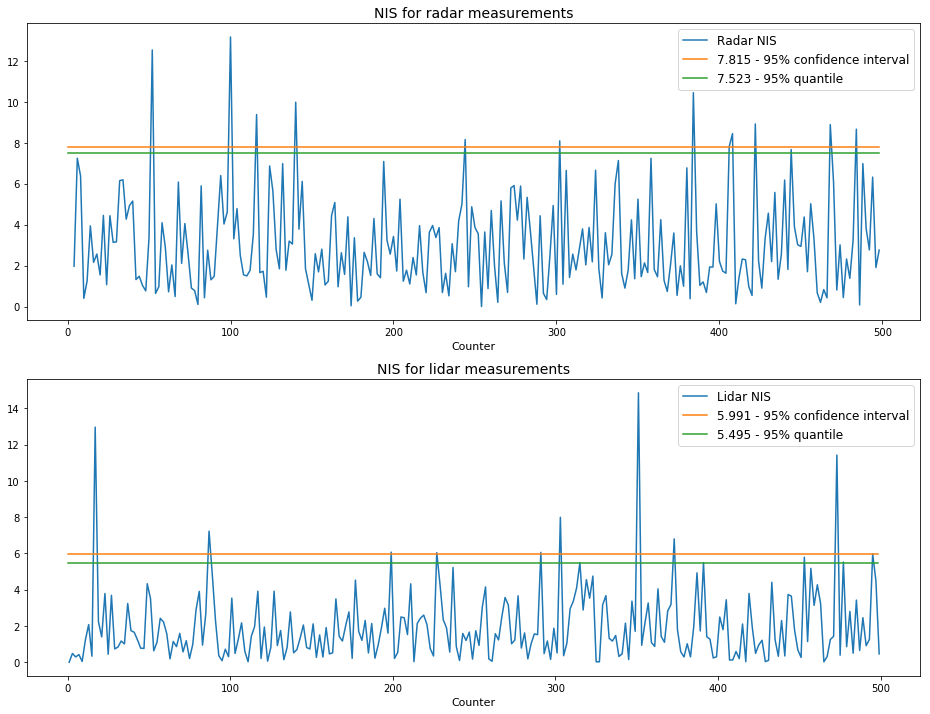

In [8]:
fig, axes = plt.subplots(2,1, figsize=(16, 12))
ax1, ax2 = axes

# Measurement counter
# 3 degrees of freedom 95% interval below 7.815
ax1.plot(Radar_counter[1:], Radar_NIS[1:], label = 'Radar NIS')
ax1.plot([7.815]*len(counter), label = '7.815 - 95% confidence interval')
ax1.plot([Radar_NIS[1:].quantile(0.95)]*len(counter), label = '{:0.3f} - 95% quantile'.format(Radar_NIS[1:].quantile(0.95)))

ax1.set_title('NIS for radar measurements', fontsize =14)
#ax1.annotate('7.815 - 95% confidence interval', xy=(2, 1), xytext=(150, 8.1))
ax1.legend(fontsize =12)
ax1.set_xlabel('Counter', fontsize = 11)

# 2 degrees of freedom 95% interval below 5.991
ax2.plot(Lidar_counter, Lidar_NIS, label = 'Lidar NIS')
ax2.plot([5.991]*len(counter), label = '5.991 - 95% confidence interval')
ax2.plot([Lidar_NIS[1:].quantile(0.95)]*len(counter), label = '{:0.3f} - 95% quantile'.format(Lidar_NIS[1:].quantile(0.95)))

# ax2.annotate('5.991 - 95% confidence interval', xy=(2, 1), xytext=(25, 6.4))
ax2.set_title('NIS for lidar measurements', fontsize =14)
ax2.legend(fontsize =12)
ax2.set_xlabel('Counter', fontsize = 11)

plt.show

fig.savefig('report_images/'+image_prefix+'NIS_consistency_check')